<a href="https://colab.research.google.com/github/chaitanyamhaiskar/Data-Analysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


In [2]:
df = pd.read_csv('/content/ML+04+Clustering+Datset.csv')
df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian wheat


In [4]:
from tabulate import tabulate
def basicDataInfo(df):
    # Display the first 5 rows of the DataFrame
    print("First 5 rows of the DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='rounded_outline'))
    print()  # Add a blank line for separation

    # Display the last 5 rows of the DataFrame
    print("Last 5 rows of the DataFrame:")
    print(tabulate(df.tail(), headers='keys', tablefmt='rounded_outline'))
    print()  # Add a blank line for separation

    # Display the shape of the DataFrame (number of rows and columns)
    shape_info = pd.DataFrame({"Number of Rows": [df.shape[0]], "Number of Columns": [df.shape[1]]})
    print("DataFrame shape:")
    print(tabulate(shape_info, headers='keys', tablefmt='rounded_outline'))

    #Display the null values if present:
    missing_values_info = df.isna().sum().to_frame(name="Number of Missing Values")
    print("Missing Values Summary:")
    print(tabulate(missing_values_info, headers='keys', tablefmt='rounded_outline'))

    # Display the number of duplicated rows in the DataFrame
    num_duplicates = df.duplicated().sum()
    tab = pd.DataFrame({'Duplicate Values':[num_duplicates]})
    print(tabulate(tab,headers='keys',tablefmt = 'rounded_outline'))


    # Display Nunique() values:
    nunique_vals = df.nunique().reset_index()
    nunique_vals.columns = ['Column', 'UniqueCount']
    # Display the number of unique values for each column
    print("Number of Unique Values per Column:")
    print(tabulate(nunique_vals, headers='keys', tablefmt='rounded_outline'))
    print()

    # Display Data Types()
    info = df.dtypes.reset_index()
    info.columns = ['Column','Data Type']
    print('Data types -> ')
    print(tabulate(info,headers = 'keys',tablefmt='rounded_outline'))
    print(df.dtypes.value_counts())

    # Describe function
    des = df.describe()
    print('Aggregate Values of The Data Set')
    print(tabulate(des,headers = 'keys',tablefmt = 'rounded_outline'))
    print()

In [5]:
basicDataInfo(df)

First 5 rows of the DataFrame:
╭────┬────────┬─────────────┬───────────────┬──────────┬─────────┬─────────────────────────┬─────────────────┬─────────────────╮
│    │   area │   perimeter │   compactness │   length │   width │   asymmetry_coefficient │   groove_length │ grain_variety   │
├────┼────────┼─────────────┼───────────────┼──────────┼─────────┼─────────────────────────┼─────────────────┼─────────────────┤
│  0 │  15.26 │       14.84 │        0.871  │    5.763 │   3.312 │                   2.221 │           5.22  │ Kama wheat      │
│  1 │  14.88 │       14.57 │        0.8811 │    5.554 │   3.333 │                   1.018 │           4.956 │ Kama wheat      │
│  2 │  14.29 │       14.09 │        0.905  │    5.291 │   3.337 │                   2.699 │           4.825 │ Kama wheat      │
│  3 │  13.84 │       13.94 │        0.8955 │    5.324 │   3.379 │                   2.259 │           4.805 │ Kama wheat      │
│  4 │  16.14 │       14.99 │        0.9034 │    5.658 │   3.562 │

In [45]:
x = df.drop('grain_variety',axis = 1)
x


,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221000,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018000,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699000,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259000,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355000,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631000,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325000,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.079625,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598000,5.044


In [13]:
df.corr(numeric_only=True)
px.imshow(df.corr(numeric_only=True),text_auto=True)

In [37]:
def find_outliers_IQR(df):
	outlier_indices = []
	df = df.select_dtypes(include = 'number')
	for col in df.columns:
		Q1 = df[col].quantile(0.25)
		Q3 = df[col].quantile(0.75)
		IQR = Q3-Q1
		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR

		outlier_list_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
		outlier_indices.extend(outlier_list_col)

	outlier_indices = list(set(outlier_indices))
	return df.iloc[outlier_indices]

In [38]:
find_outliers_IQR(df)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
174,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
158,11.75,13.52,0.8082,5.444,2.678,4.378,5.310


In [39]:
def outlierFinder(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print('lower bound ->',lower_bound)
    print('upper bound ->',upper_bound)
    print('IQR->',IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f'{len(outliers)} outliers found.')
        while True:
            ch = input('Do you want to cap the outliers (yes/no)? ').strip().lower()
            if ch == 'yes':
                df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))
                print(f'Outliers in {col} have been capped.')
                break

            elif ch == 'no':
                print('Outliers not capped.')
                break
            else:
                print("Please enter 'yes' or 'no'.")
    else:
        print('No outliers found.')
    return df

In [44]:
outlierFinder(df,'compactness')

lower bound -> 0.8105875
upper bound -> 0.9340875
IQR-> 0.030874999999999986
3 outliers found.
Do you want to cap the outliers (yes/no)? yes
Outliers in compactness have been capped.


,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221000,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018000,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699000,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259000,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355000,5.175,Kama wheat
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631000,4.870,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325000,5.003,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.079625,5.056,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598000,5.044,Canadian wheat


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(x)


In [47]:
from sklearn.cluster import KMeans
num_of_cluster = range(1,10)
wcss = []
for i in num_of_cluster:
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [48]:
wcss

[1470.0,
 659.1474009548497,
 430.298481751223,
 371.0356644664015,
 327.3081920394402,
 289.6706650781344,
 262.89202479570037,
 241.69561686035763,
 222.47156625093191]

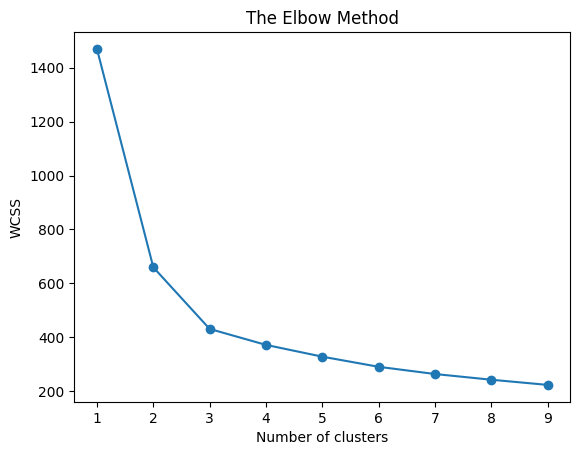

In [49]:
import matplotlib.pyplot as plt
plt.plot(num_of_cluster,wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
model = KMeans(n_clusters=3,init='k-means++',random_state=42)
labels = model.fit_predict(scaled)
print(labels)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [51]:
target = df['grain_variety']
cf = pd.DataFrame({'labels':labels,'Target':target})
cross_tab = pd.crosstab(cf['labels'],cf['Target'])
cross_tab


Target,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,2,65
1,66,6,0
2,4,62,5


In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled,labels)

0.40080592215222155

In [59]:
num_of_cluster = range(2,8)
shc = []
for i in num_of_cluster:
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  cl = kmeans.fit_predict(scaled)
  shc.append(silhouette_score(scaled,cl))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [60]:
shc

[0.4656010044274899,
 0.40080592215222155,
 0.3373662527862716,
 0.2759042368712843,
 0.2888900738838628,
 0.2757033244598547]